<a href="https://colab.research.google.com/github/suphaporn7041/Data-analyst/blob/main/Heart_Disease_EDA_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Explore Data Analysis (EDA)

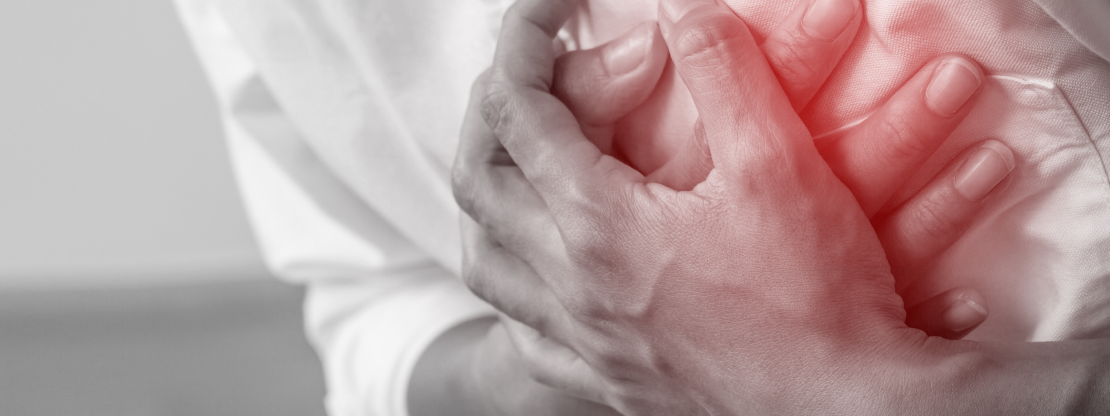

In [1]:
# import necceasary library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Kaggle/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Description 📢

**Context**
1. Age: Age of the patient [years]

2. Sex: Sex of the patient [M: Male, F: Female]

3. ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: Resting blood pressure [mm Hg]

5. Cholesterol: Serum cholesterol [mm/dl]

6. FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202] 9 ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: ST [Numeric value measured in depression]

11. ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. HeartDisease: Output class [1: heart disease, 0: Normal]

## Explore Data 🔦

In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T.round().style.bar(color='lightgreen')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,54.000000,9.000000,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.000000,19.000000,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,199.000000,109.000000,0.000000,173.000000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,137.000000,25.000000,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,1.000000,1.000000,-3.000000,0.000000,1.000000,2.000000,6.000000
HeartDisease,918.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.5,9.4,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.4,18.5,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,198.8,109.4,0.0,173.2,223.0,267.0,603.0
FastingBS,918.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
MaxHR,918.0,136.8,25.5,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.9,1.1,-2.6,0.0,0.6,1.5,6.2
HeartDisease,918.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0


## Predictor and Target variable 🚩

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
numeric_feature = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
categorical_feature = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

In [ ]:
print('Number of numeric feature: ',len(numeric_feature.columns))
print('Number of categorical feature: ',len(categorical_feature.columns))
print('Target variable:',len(df[['HeartDisease']].columns))

Number of numeric feature:  5
Number of categorical feature:  6
Target variable: 1


## Plotting 🎨

### **Numeric Features**

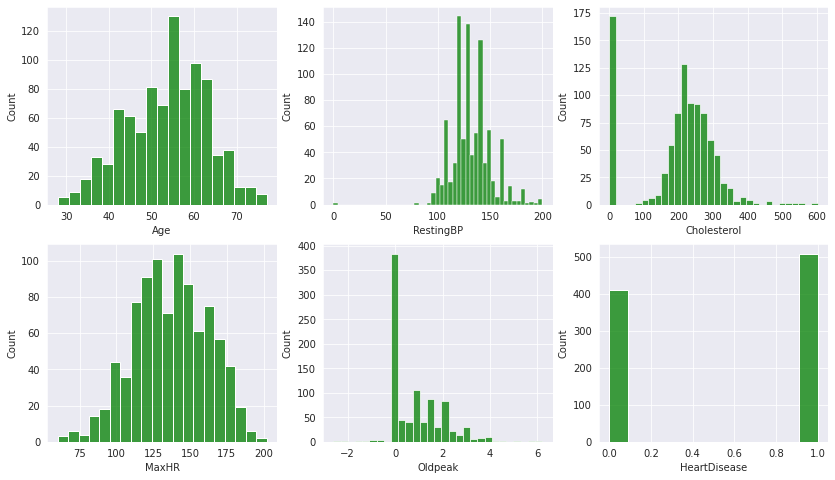

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
data = df

sns.histplot(ax = axes[0, 0], data=data, x='Age', color='g')
sns.histplot(ax = axes[0, 1], data=data, x='RestingBP', color='g')
sns.histplot(ax = axes[0, 2], data=data, x='Cholesterol', color='g')
sns.histplot(ax = axes[1, 0], data=data, x='MaxHR', color='g')
sns.histplot(ax = axes[1, 1], data=data, x='Oldpeak', color='g')
sns.histplot(ax = axes[1, 2], data=data, x='HeartDisease', color='g')

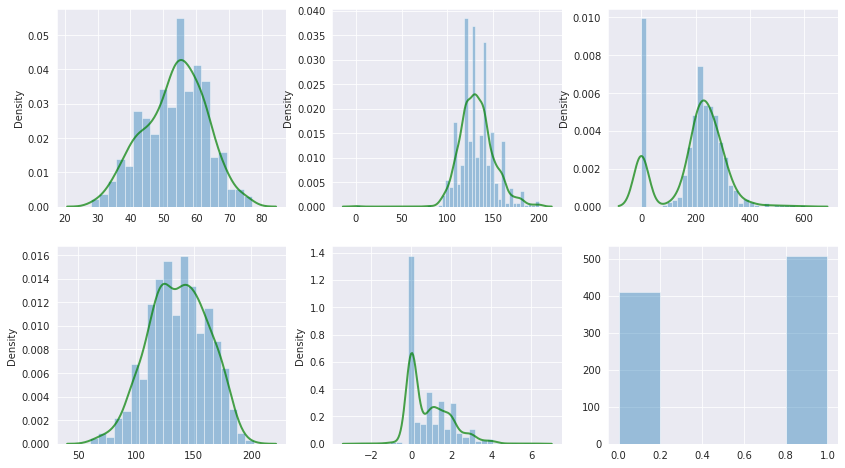

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
alpha = 0.7
line = 2 
color = 'g'

sns.distplot(ax = axes[0, 0], x=df['Age'], kde=True, kde_kws={"color": color, "alpha": alpha, "linewidth": line})
sns.distplot(ax = axes[0, 1], x=df['RestingBP'], kde=True, kde_kws={"color": color, "alpha": alpha, "linewidth": line})
sns.distplot(ax = axes[0, 2], x=df['Cholesterol'], kde=True, kde_kws={"color": color, "alpha": alpha, "linewidth": line})
sns.distplot(ax = axes[1, 0], x=df['MaxHR'], kde=True, kde_kws={"color": color, "alpha": alpha, "linewidth": line})
sns.distplot(ax = axes[1, 1], x=df['Oldpeak'], kde=True, kde_kws={"color": color, "alpha": alpha, "linewidth": line})
sns.distplot(ax = axes[1, 2], x=df['HeartDisease'], kde=False)

### **Catagorical Features**

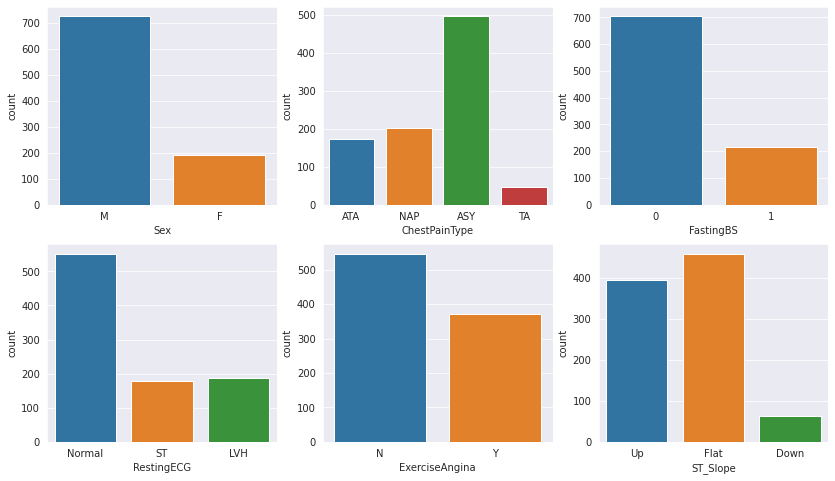

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
data = df
categorical_feature = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

sns.countplot(ax = axes[0, 0], data=data, x='Sex')
sns.countplot(ax = axes[0, 1], data=data, x='ChestPainType')
sns.countplot(ax = axes[0, 2], data=data, x='FastingBS')
sns.countplot(ax = axes[1, 0], data=data, x='RestingECG')
sns.countplot(ax = axes[1, 1], data=data, x='ExerciseAngina')
sns.countplot(ax = axes[1, 2], data=data, x='ST_Slope')

In [ ]:
for i in categorical_feature:
  print(df[[i]].value_counts())
  print('------------------------')

Sex
M      725
F      193
dtype: int64
------------------------
ChestPainType
ASY              496
NAP              203
ATA              173
TA                46
dtype: int64
------------------------
FastingBS
0            704
1            214
dtype: int64
------------------------
RestingECG
Normal        552
LVH           188
ST            178
dtype: int64
------------------------
ExerciseAngina
N                 547
Y                 371
dtype: int64
------------------------
ST_Slope
Flat        460
Up          395
Down         63
dtype: int64
------------------------


### Correlation and Relationship 🔐

In [ ]:
# Range diverging color palettes
sns.color_palette("coolwarm", 10)

[(0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665)]

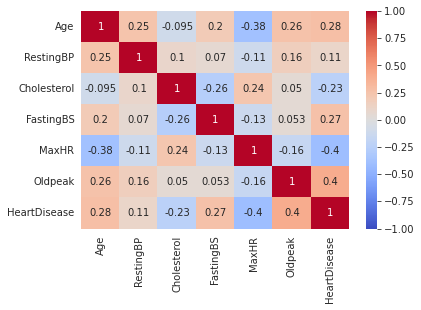

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

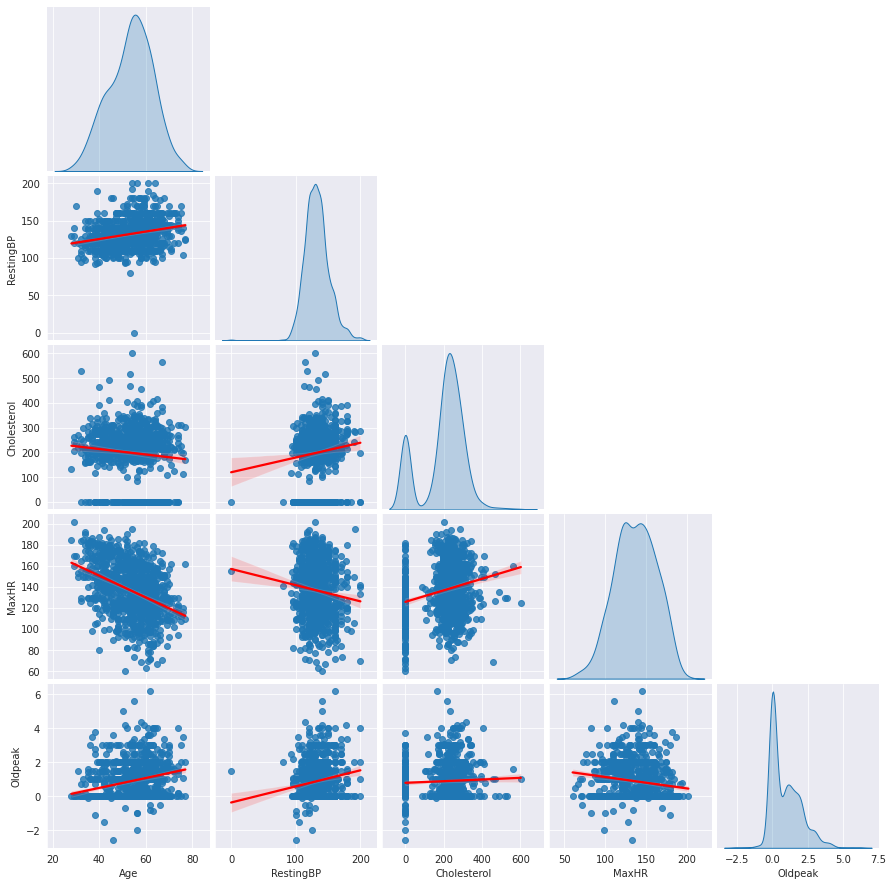

In [ ]:
sns.pairplot(numeric_feature, corner=True, kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}} )

แยกแยะด้วยการเกิดโรคหัวใจ

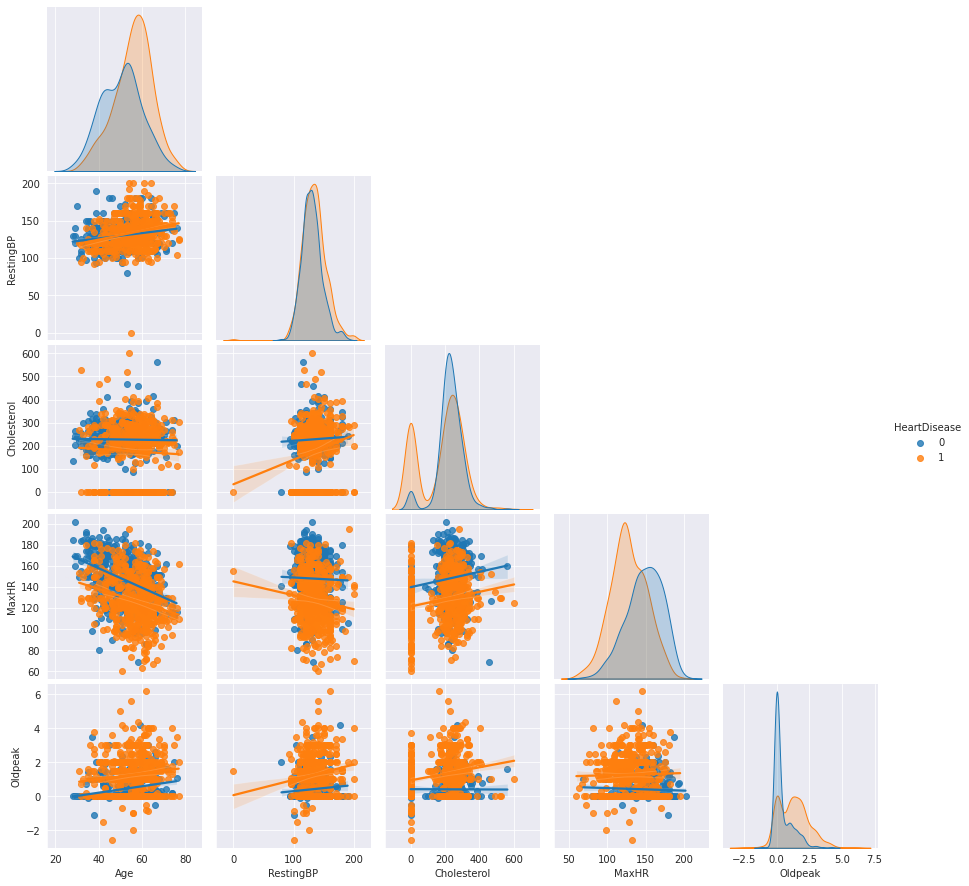

In [ ]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']],
             corner=True, kind='reg', diag_kind="kde", hue='HeartDisease')

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')